In [3]:
from scipy.stats import chi2_contingency
obs = np.array([[10, 10, 20], [20, 20, 20]])
chi2_contingency(obs)

(2.7777777777777777,
 0.24935220877729622,
 2,
 array([[12., 12., 16.],
        [18., 18., 24.]]))

In [11]:
import numpy as np
import pandas as pd

In [7]:
arr = chi2_contingency(obs)[-1]

In [12]:
np.cumsum(arr)

array([ 12.,  24.,  40.,  58.,  76., 100.])

In [13]:
df = pd.read_csv('data/student-mat.csv')

In [16]:
table = pd.crosstab(df['sex'],df['school'])

In [17]:
table.values 

array([[183,  25],
       [166,  21]], dtype=int64)

In [18]:
chi2_contingency(table.values)

(0.007584677753178483,
 0.9305999299762074,
 1,
 array([[183.77721519,  24.22278481],
        [165.22278481,  21.77721519]]))

In [19]:
df = pd.read_csv('data/PlantGrowth.csv', index_col= 0)

In [20]:
df

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl
6,4.61,ctrl
7,5.17,ctrl
8,4.53,ctrl
9,5.33,ctrl
10,5.14,ctrl



# ANOVA (Analsis de varianza)

**ANOVA** = Análisis de la varianza, es una técnica que permite comparar tres o más medias de distintas muestras independientes.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3=\ldots=\mu_n$

$H1 :$ Al menos una es diferente

Los p_values se sacan con el F-test (F de Snedecor), comparando varianzas. Lo que se busca es una diferencia significativa en al menos uno de los grupos.

Es el ratio entre la varianza de los grupos y el promedio de la varianza de dentro de los grupos

# Supuestos

+ La variable dependiente debe ser **continua**
+ la variable dependiente se distribuye **normalmente** en cada grupo
+ Homogeneidad de varianza
+ las observaciones son independientes
+ **NO DEBEMOS TENER OUTLIERS**

In [24]:
grupos =df['group'].unique() 
grupos

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [26]:
data={g:df.weight[df.group==g] for g in grupos}

data

{'ctrl': 1     4.17
 2     5.58
 3     5.18
 4     6.11
 5     4.50
 6     4.61
 7     5.17
 8     4.53
 9     5.33
 10    5.14
 Name: weight, dtype: float64,
 'trt1': 11    4.81
 12    4.17
 13    4.41
 14    3.59
 15    5.87
 16    3.83
 17    6.03
 18    4.89
 19    4.32
 20    4.69
 Name: weight, dtype: float64,
 'trt2': 21    6.31
 22    5.12
 23    5.54
 24    5.50
 25    5.37
 26    5.29
 27    4.92
 28    6.15
 29    5.80
 30    5.26
 Name: weight, dtype: float64}

In [28]:
from scipy.stats import f_oneway, norm, f, chi2, chi2_contingency


In [30]:
f_score, p_value = f_oneway(data['trt2'], data['ctrl'], data['trt1'])

print (f_score, p_value)

4.846087862380136 0.0159099583256229


In [32]:
f_score, p_value = f_oneway(data['trt2'], data['ctrl'])

print (f_score, p_value)

4.554043294351827 0.04685138491157386


In [33]:
f_score, p_value = f_oneway(data['trt1'], data['ctrl'])

print (f_score, p_value)

1.419101297362316 0.24902316597300575


In [34]:
rate=pd.read_csv('data/rate_by_city.csv')

rate.head()

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1


In [35]:
rate.City.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [36]:
rate['city_count']=rate.groupby('City').cumcount()

rate.head()

,Rate,City,city_count
0,13.75,1,0
1,13.75,1,1
2,13.50,1,2
3,13.50,1,3
4,13.00,1,4


In [38]:
rate.groupby('City').count()

,Rate,city_count
City,,
1,9,9
2,9,9
3,9,9
4,9,9
5,9,9
6,9,9


In [37]:
rate_pivot=rate.pivot(columns='City', values='Rate', index='city_count')
rate_pivot

City,1,2,3,4,5,6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [40]:
f, p = f_oneway(*[rate_pivot[i] for i in range(1, 7)])
p

0.001174551414504048

In [ ]:
# rechazamos hipotesis nula por lo cual las medias de las ciudades son diferentes

# Para p-value se busca:

+ 99% - confianza se busca que p-value sea menor de 0.01 (alpha) para rechazar hipotesis nula

+ 95% - confianza se busca que p-value sea menor de 0.05 (alpha)para rechazar hipotesis nula

+ 90% - confianza se busca que p-value sea menor de 0.10 (alpha)para rechazar hipotesis nula

In [42]:
p = []
for i in range(len(rate_pivot.columns)-1):
    p.append(f_oneway(rate_pivot.iloc[:,i],rate_pivot.iloc[:,i+1]).pvalue)

In [43]:
p

[0.05336032220284218,
 0.03434494091740313,
 0.8692149917799985,
 0.5603256524164064,
 0.0004624250306693342]

In [44]:
#1 != 2  en sus medias
#2 != 3 en sus medias 
#3 == 4 en sus medias
#4 == 5 en su medias
#5 != 6 en sus medias

# Ejemplo Campo


**ANOVA Two-Way** : Dos variables independientes categoricas y una dependiente continua.


Supongamos que se tienen datos de produccion de un campo, y ademas los datos del tipo de fertilizante y cantidad de agua usada.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\ldots=\mu_n$  (no hay diferencia significativa entre campos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un campo)

In [46]:
df=pd.read_csv('data/crop_yield.csv')
df.head()


,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [47]:
df['Fert'].unique()

array(['A', 'B'], dtype=object)

In [48]:
df['Water'].unique()

array(['High', 'Low'], dtype=object)

In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [58]:
modelo=ols('Yield ~ C(Fert)+C(Water)', df).fit()
#Nuestra variable a explicar es la produccion de maiz bajo diversos factores y ver si estos explican a la produccion

In [59]:
anova = sm.stats.anova_lm(modelo, typ = 2)

In [60]:
anova

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.669070,0.029228
C(Water),63.368,1.0,5.191895,0.035887
Residual,207.488,17.0,NaN,NaN


In [54]:
#La hipotesis nula para F-Test es decir si nuestras variables indpendientes son estadistidicamente significativas para
#el modelo, es decir si explican o no a mi variable dependiente

In [61]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     5.430
Date:                Wed, 11 Nov 2020   Prob (F-statistic):             0.0150
Time:                        11:18:04   Log-Likelihood:                -51.772
No. Observations:                  20   AIC:                             109.5
Df Residuals:                      17   BIC:                             112.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.6800      1.353     24.153      0.000      29.825      35.535
C(Fert)[T.B]       -3.7200      1.562     -2.381      0.029      -7.016      -0.424
C(Water)[T.Low]    -3.5600      1.562     -2.279      0.036      -6.856      -0.264
==============================================================================
Omnibus:                        1.169   Durbin-Watson:                   2.736
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.820
Skew:                          -0.081   Prob(JB):                        0.664
Kurtosis:                       2.022   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
tabla = pd.read_table("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt")
tabla

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95
5,B,4.02,7.20,8.94
6,C,3.99,6.09,10.02
7,C,3.30,5.88,9.63
8,C,4.41,6.51,10.38
9,D,3.75,5.19,11.40


In [63]:
import pandas as pd
import seaborn as sns

In [67]:
d_melt = pd.melt(tabla, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])

In [68]:
d_melt

,Genotype,variable,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94
5,B,1_year,4.02
6,C,1_year,3.99
7,C,1_year,3.30
8,C,1_year,4.41
9,D,1_year,3.75


In [69]:
d_melt.columns = ['Genotype', 'years', 'value']

In [70]:
d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


<AxesSubplot:xlabel='Genotype', ylabel='value'>

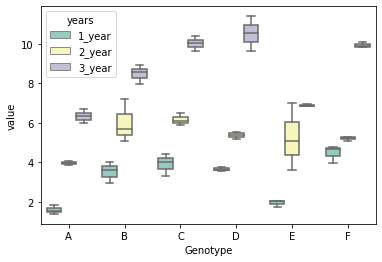

In [71]:
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 

In [72]:
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()

In [73]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


ModuleNotFoundError: No module named 'bioinfokit'

# Regresion Lineal

**Ecuacion de la recta**

$$y = m·x+b$$

In [76]:
import matplotlib.pyplot as plt

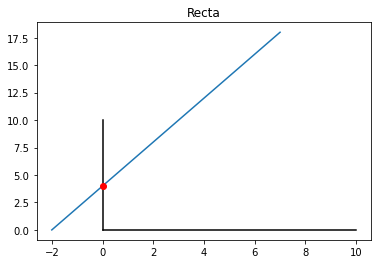

In [77]:
x=[i for i in range(-2, 8)]

m=2
b=4

y=[m*x+b for x in x]

plt.plot(x, y)
plt.plot([0,0], [0,10], color='black')
plt.plot([0,10], [0,0], color='black')
plt.plot(0, b, 'ro')
plt.title('Recta');

In [78]:
from scipy.stats import linregress

In [113]:
auto=pd.read_csv('data/auto-mpg.csv')

auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [114]:
train = auto.loc[:300,['cylinders','horse_power','weight']]
train

,cylinders,horse_power,weight
0,8,130.0,3504
1,8,165.0,3693
2,8,150.0,3436
3,8,150.0,3433
4,8,140.0,3449
...,...,...,...
296,4,80.0,2670
297,5,77.0,3530
298,8,125.0,3900
299,4,71.0,3190


In [115]:
y = auto.loc[:300,['acceleration']]

In [116]:
train['y'] = y

In [117]:
train

,cylinders,horse_power,weight,y
0,8,130.0,3504,12.0
1,8,165.0,3693,11.5
2,8,150.0,3436,11.0
3,8,150.0,3433,12.0
4,8,140.0,3449,10.5
...,...,...,...,...
296,4,80.0,2670,15.0
297,5,77.0,3530,20.1
298,8,125.0,3900,17.4
299,4,71.0,3190,24.8


In [118]:
test = auto.loc[300:,['cylinders','horse_power','weight']]

In [121]:
import statsmodels.api as sm

In [96]:
y = train.pop('y')

In [107]:
.isnull().sum()

0

In [122]:
train.dropna(inplace = True)

In [123]:
train

,cylinders,horse_power,weight,y
0,8,130.0,3504,12.0
1,8,165.0,3693,11.5
2,8,150.0,3436,11.0
3,8,150.0,3433,12.0
4,8,140.0,3449,10.5
...,...,...,...,...
296,4,80.0,2670,15.0
297,5,77.0,3530,20.1
298,8,125.0,3900,17.4
299,4,71.0,3190,24.8


In [128]:
modelo = sm.OLS(train.iloc[:,-1],train.iloc[:,:-1]).fit()

In [129]:
modelo.params

cylinders      0.336670
horse_power   -0.123344
weight         0.008209
dtype: float64

In [134]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              739.0
Date:                Wed, 11 Nov 2020   Prob (F-statistic):                   4.33e-137
Time:                        12:20:16   Log-Likelihood:                         -924.30
No. Observations:                 299   AIC:                                      1855.
Df Residuals:                     296   BIC:                                      1866.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
cylinders       0.3367      0.420      0.802      0.423      -0.490       1.163
horse_power    -0.1233      0.015     -8.008      0.000      -0.154      -0.093
weight          0.0082      0.001      9.884      0.000       0.007       0.010
==============================================================================
Omnibus:                       26.571   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.232
Skew:                          -0.100   Prob(JB):                      0.00989
Kurtosis:                       2.163   Cond. No.                     4.43e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
modelo.params

cylinders      0.336670
horse_power   -0.123344
weight         0.008209
dtype: float64

In [136]:
from scipy.stats import linregress

In [148]:
train.reset_index(inplace = True)

In [182]:
linreg = linregress(train['weight'], train['y'])

In [183]:
linreg.intercept

19.787300440882333

In [184]:
linreg

LinregressResult(slope=-0.001440221943782781, intercept=19.787300440882333, rvalue=-0.4603321735304961, pvalue=4.3525145759905914e-17, stderr=0.00016116434217173186)

In [175]:
t = train.loc[:,['cylinders','weight']]

In [176]:
y = train.loc[:,['y']]

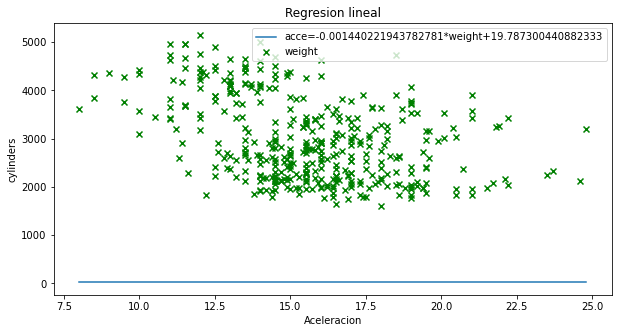

In [188]:
x=np.linspace(auto.acceleration.min(), auto.acceleration.max(), 50)
y=linreg[1]+linreg[0]*x

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='acce={}*weight+{}'.format(linreg[0], linreg[1]))
plt.scatter(auto.acceleration,auto.weight, marker='x', c='g', label='weight')


plt.title('Regresion lineal')
plt.xlabel('Aceleracion')
plt.ylabel('cylinders')
plt.legend()
plt.show();

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [190]:
auto=auto.dropna()
x=auto[[
    'acceleration',
    'cylinders',
    'weight',
    'horse_power',
    'model_year',
    'displacement'
]]

y=auto.mpg

In [192]:
x

,acceleration,cylinders,weight,horse_power,model_year,displacement
0,12.0,8,3504,130.0,70,307.0
1,11.5,8,3693,165.0,70,350.0
2,11.0,8,3436,150.0,70,318.0
3,12.0,8,3433,150.0,70,304.0
4,10.5,8,3449,140.0,70,302.0
...,...,...,...,...,...,...
393,15.6,4,2790,86.0,82,140.0
394,24.6,4,2130,52.0,82,97.0
395,11.6,4,2295,84.0,82,135.0
396,18.6,4,2625,79.0,82,120.0


In [195]:
modelo=LinearRegression(fit_intercept=True).fit(x,y) #entrenamiento

In [196]:
pred=modelo.predict(x) #prediccion

In [197]:
print(modelo.coef_)

[ 8.52732469e-02 -3.29859089e-01 -6.79461791e-03 -3.91355574e-04
  7.53367180e-01  7.67843024e-03]


In [199]:
print(r2_score(y,pred))

0.8092552890383932


In [200]:
print(modelo.intercept_)

-14.535250480506239


In [203]:
auto.mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [205]:
x=[10, 4, 3000, 150, 80, 320] #nuevos valores
b_n=[8.52732469e-02, -3.29859089e-01, -6.79461791e-03, -3.91355574e-04,
     7.53367180e-01, 7.67843024e-03] #estimadores-parametros-betas-proporcion

b_0=-14.535250480506473 #intercepto a y

mpg = 0

for i in range(len(x)):
    mpg+=x[i]*b_n[i]
    
mpg+=b_0
mpg

27.281960643193532

# Bayes

https://en.wikipedia.org/wiki/Thomas_Bayes

![bayes](data/bayes0.jpeg)

$$A \cap B = B \cap A$$

$$P(A \cap B) = P(B \cap A)$$

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

### Regla de Bayes

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

$$P(B) = \sum_{\Omega} P(B|A)P(A)$$

# Ejemplo: Seguro de coche segun color

**Eventos**

+ $A: =$ Accidente de coche
+ $B: =$ Color del coche (rojo, por ejemplo)

**¿Que es cada cosa?**

+ $P(A|B) :=$ ¿Prob de tener un accidente si mi coche es rojo? (lo que buscamos)
+ $P(A) :=$ Prob de accidente (proporcion de coches accidentados en todo el parque movil)
+ $P(B|A) :=$ Si ya he tenido un accidente, ¿cual es la prob de que mi coche sea rojo? (proporcion de coches rojos entre los accidentados)
+ $P(B) :=$ Prob de coche rojo (proporcion de coches rojos en todo el parque movil)

**Supongamos...**
 
+ $P(A) = 0.1$ 
+ $P(B|A) = 0.3$ 
+ $P(B) = 0.2$


**Entonces..**

In [208]:
print ('P(A|B) = {}'.format(0.3*0.1/0.2))

P(A|B) = 0.15


**Conclusion**

La prob de tener un accidente si mi coche es rojo es de 0.15

In [209]:
def bayes(priori, verosimilitud):                    # regla de Bayes
    marginal=sum(np.multiply(priori, verosimilitud))
    posteriori=np.divide(np.multiply(priori, verosimilitud), marginal)
    return posteriori

### 1. Monty Hall Problem
Suppose you are a contestant on the popular game show Let's Make a Deal. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [212]:
prioris=[1/3, 1/3, 1/3]   

v_premio=[0, 0, 1]            # verosimilitud del premio
print (bayes(prioris, v_premio)[1])


#Si no se cambia la puerta 

0.3333333333333333


In [211]:
print (bayes(prioris, v_premio)[2])

0.6666666666666666


In [ ]:
# Bayes Lab

### 2. Cookie Problem
Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [213]:
prioris=[1/2, 1/2]    

In [215]:
v_vainilla=[3/4, 2/4]      # verosimilitud vainilla
v_chocolate=[1/4, 2/4]     # verosimilitud chocolate

In [216]:
print (bayes(prioris, v_vainilla))

[0.6 0.4]


In [217]:
print(bayes(prioris, v_chocolate))

[0.33333333 0.66666667]


### 3. Candy Problem
Suppose you have two bags of candies:

In **Bag 1**, the mix of colors is:
* Brown - 30%
* Yellow - 20%
* Red - 20%
* Green - 10%
* Orange - 10%
* Tan - 10%


In **Bag 2**, the mix of colors is:
* Blue - 24%
* Green - 20%
* Orange - 16%
* Yellow - 14%
* Red - 13%
* Brown - 13%




Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.

In [223]:
prioris=[1/2, 1/2]         # bolsas



v_marron=[0.3, 0.13]       # verosimilitud marron
v_amarillo=[0.2, 0.14]     # verosimilitud amarillo
v_rojo=[0.2, 0.13]         # verosimilitud rojo
v_verde=[0.1, 0.2]         # verosimilitud verde
v_naranja=[0.1, 0.16]      # verosimilitud naranja
v_mandarina=[0.1, 0]       # verosimilitud mandarina
v_azul=[0, 0.24]           # verosimilitud azul

print(bayes(prioris,v_amarillo))

[0.58823529 0.41176471]


In [229]:
#la probabilidad de que escojamos un dulce amarillo y un dulce verde y que el amarillo provenga de la bolsa 1

print(bayes(prioris,[v_amarillo[0]*v_verde[1], v_amarillo[1]*v_verde[0]])[0])

0.7407407407407408


In [228]:
#la probabilidad de que escojamos un dulce amarillo y un dulce verde y que el amarillo provenga de la bolsa 2


print(bayes(prioris,[v_amarillo[0]*v_verde[1], v_amarillo[1]*v_verde[0]])[1])

0.25925925925925924


In [227]:
sum(bayes(prioris,[v_amarillo[0]*v_verde[1], v_amarillo[1]*v_verde[0]]))

1.0